# Univariate Statistics

Basics univariate statistics are required to explore dataset:

- Discover associations between a variable of interest and potential predictors. It is strongly recommended to start with simple univariate methods before moving to complex multivariate predictors. 

- Assess the prediction performances of machine learning predictors.

- Most of the univariate statistics are based on the linear model which is one of the main model in machine learning.

## Libraries

**Statistics**

- Descriptive statistics and distributions: [Numpy](https://numpy.org/doc/stable/reference/routines.statistics.html)
- Distributions and tests: [scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
- Advanced statistics (linear models, tests, time series): [Statsmodels](https://www.statsmodels.org/), see also [Statsmodels API](https://www.statsmodels.org/stable/api.html):
    * `statsmodels.api`: Imported using `import statsmodels.api as sm`.
    * `statsmodels.formula.api`: A convenience interface for specifying models using formula strings and DataFrames. Canonically imported using `import statsmodels.formula.api as smf`
    * `statsmodels.tsa.api`: Time-series models and methods. Canonically imported using `import statsmodels.tsa.api as tsa`.

In [1]:
# Manipulate data
import numpy as np
import pandas as pd

# Statistics
import scipy.stats
import statsmodels.api as sm
#import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import jarque_bera

**Plots**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pystatsml.plot_utils

# Plot parameters
plt.style.use('seaborn-v0_8-whitegrid')
fig_w, fig_h = plt.rcParams.get('figure.figsize')
plt.rcParams['figure.figsize'] = (fig_w, fig_h * .5)
%matplotlib inline

**Datasets**

Salary

In [3]:
try:
    salary = pd.read_csv("../datasets/salary_table.csv")
except:
    url = 'https://github.com/duchesnay/pystatsml/raw/master/datasets/salary_table.csv'
    salary = pd.read_csv(url)

Iris

In [4]:
# Load iris datset
iris = sm.datasets.get_rdataset("iris").data
iris.columns = [s.replace('.', '') for s in iris.columns]
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

## Descriptive Statistics

### Mean

Properties of the expected value operator $\operatorname{E}(\cdot)$ of a random variable $X$

\begin{align}
    E(X + c) &= E(X) + c \\ 
    E(X + Y) &= E(X) + E(Y) \\ 
    E(aX)    &= a E(X)
\end{align}


The estimator $\bar{x}$ on a sample of size $n$: $x = x_1, ..., x_n$ is given by
$$
    \bar{x} = \frac{1}{n} \sum_i x_i
$$

$\bar{x}$ is itself a random variable with properties:

- $E(\bar{x}) = \bar{x}$,

- $\operatorname{Var}(\bar{x}) = \frac{\operatorname{Var}(X)}{n}$.

### Variance

$$
    \operatorname{Var}(X) = E((X - E(X))^2) =  E(X^2) - (E(X))^2
$$

The estimator is
$$
    \sigma_x^2 = \frac{1}{n-1} \sum_i (x_i - \bar{x})^2
$$

Note here the subtracted 1 degree of freedom (df) in the divisor. In standard statistical practice, $df=1$ provides an unbiased estimator of the variance of a hypothetical infinite population. With $df=0$ it instead provides a maximum likelihood estimate of the variance for normally distributed variables.

### Standard deviation

$$
    \operatorname{Std}(X) = \sqrt{\operatorname{Var}(X)}
$$

The estimator is simply $\sigma_x = \sqrt{\sigma_x^2}$.

### Covariance

$$
    \operatorname{Cov}(X, Y) = E((X - E(X))(Y - E(Y))) =  E(XY) - E(X)E(Y).
$$

Properties:

\begin{align}
    \operatorname{Cov}(X, X) &= \operatorname{Var}(X)\\
    \operatorname{Cov}(X, Y) &= \operatorname{Cov}(Y, X)\\
    \operatorname{Cov}(cX, Y) &= c \operatorname{Cov}(X, Y)\\
    \operatorname{Cov}(X+c, Y) &= \operatorname{Cov}(X, Y)\\
\end{align}


The estimator with $df=1$ is
$$
    \sigma_{xy} = \frac{1}{n-1} \sum_i (x_i - \bar{x}) (y_i - \bar{y}).
$$

### Correlation

$$
    \operatorname{Cor}(X, Y) = \frac{\operatorname{Cov}(X, Y)}{\operatorname{Std}(X)\operatorname{Std}(Y)}
$$

The estimator is
$$
    \rho_{xy} = \frac{\sigma_{xy}}{\sigma_{x} \sigma_{y}}.
$$

### Standard Error (SE) 

The standard error (SE) is the standard deviation (of the sampling distribution) of a statistic: 
$$
    \operatorname{SE}(X) = \frac{\operatorname{Std}(X)}{\sqrt{n}}.
$$

It is most commonly considered for the mean with the estimator

\begin{align}
\operatorname{SE}(X) &= \operatorname{Std}(X) = \sigma_{\bar{x}}\\
      &= \frac{\sigma_x}{\sqrt{n}}.
\end{align}


### Descriptives statistics with Numpy

- Generate 2 random samples: $x \sim N(1.78, 0.1)$ and $y \sim N(1.66, 0.1)$, both of size 10.
- Compute $\bar{x}, \sigma_x, \sigma_{xy}$ (`xbar, xvar, xycov`) using only the `np.sum()` operation. 

Explore the `np.` module to find out which Numpy functions performs the same computations and compare them (using `assert`) with your previous results.

Caution! By default `np.var()` used the biased estimator (with ddof=0). Set ddof=1 to use unbiased estimator.

In [5]:
n = 10
np.random.seed(seed=42)  # make the example reproducible
x = np.random.normal(loc=1.78, scale=.1, size=n)
y = np.random.normal(loc=1.66, scale=.1, size=n)

xbar = np.mean(x)
assert xbar == np.sum(x) / x.shape[0]

xvar = np.var(x, ddof=1)
assert xvar == np.sum((x - xbar) ** 2) / (n - 1)

Covariance

In [6]:
xycov = np.cov(x, y)
print(xycov)

ybar = np.sum(y) / n
assert np.allclose(xycov[0, 1], np.sum((x - xbar) * (y - ybar)) / (n - 1))
assert np.allclose(xycov[0, 0], xvar)
assert np.allclose(xycov[1, 1], np.var(y, ddof=1))

[[ 0.00522741 -0.00060351]
 [-0.00060351  0.00570515]]


### Descriptives Statistics on Iris Dataset

**With Pandas**

Columns' means

In [7]:
iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].mean()

SepalLength    5.843333
SepalWidth     3.057333
PetalLength    3.758000
PetalWidth     1.199333
dtype: float64

Columns' std-dev. Pandas normalizes by N-1 by default.

In [8]:
iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].std()

SepalLength    0.828066
SepalWidth     0.435866
PetalLength    1.765298
PetalWidth     0.762238
dtype: float64

**With Numpy**

In [9]:
X = iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].values
X.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

Columns' std-dev. Numpy normalizes by N by default. Set ddof=1 to normalize by N-1 to get the unbiased estimator.

In [10]:
X.std(axis=0, ddof=1)

array([0.82806613, 0.43586628, 1.76529823, 0.76223767])

## Probability Distributions

- Probabilities of occurrence of possible outcomes
- Description of a random phenomenon in terms of its sample space


Terminology:

- Random variable, RV: $X$: takes values from a sample space.
- **Probability Density Function** [PDF](https://en.wikipedia.org/wiki/Probability_density_function): $P(X) \in [0, 1]$ for $X \in \mathbb{R}$ or **Probability mass function** [PMF](https://en.wikipedia.org/wiki/Probability_mass_function) if $X$ is a discrete RV.
- **Cumulative Distribution Function** [CDF](https://en.wikipedia.org/wiki/Cumulative_distribution_function) $P(X \leq x)$.
- **Percent Point Function** or [Quantile Function](https://en.wikipedia.org/wiki/Quantile_function) (inverse of CDF), i.e., values of $x$ such $P(X \leq x)=$ a given quantile.

### Histogram as probability [density function estimator](https://en.wikipedia.org/wiki/Density_estimation)

[numpy.histogram](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html#numpy.histogram) can be used to probability density function at the each histogram bin, setting `density=True` parameter. Warning, [histogram doesn't sum to 1](https://stackoverflow.com/questions/21532667/numpy-histogram-cumulative-density-does-not-sum-to-1). Histogram as PDF estimator should be multiplied by dx's to sum to 1.

Sum(Hist)= 5.589909828006291 Sum(Hist * dx)= 1.0


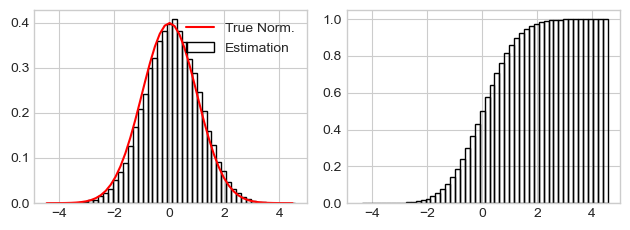

In [11]:
x = np.random.normal(size=50000)
hist, bins = np.histogram(x, bins=50, density=True)
dx = np.diff(bins)
print("Sum(Hist)=", np.sum(hist), "Sum(Hist * dx)=", np.sum(hist * dx))

pdf = scipy.stats.norm.pdf(bins) # True probability density function

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True)
ax1.bar(bins[1:], hist, width=dx, fill=False, label="Estimation")
ax1.plot(bins, pdf, 'r-', label="True Norm.")
ax1.legend()
ax2.bar(bins[1:], (hist * dx).cumsum(), fill=False, width=dx)
fig.tight_layout()

### [Kernel Density Estimation (KDE)](https://en.wikipedia.org/wiki/Kernel_density_estimation)

TODO

### Normal distribution

The normal distribution, noted $\mathcal{N}(\mu, \sigma)$ with parameters: $\mu$ mean (location) and $\sigma>0$ std-dev. Estimators: $\bar{x}$ and $\sigma_{x}$.

The normal distribution, noted $\mathcal{N}$, is useful because of the central limit theorem (CLT) which states that: given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables, each with a well-defined expected value and well-defined variance, will be approximately normally distributed, regardless of the underlying distribution.

Documentation:

- [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)
- [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm)


Random number generator using Numpy

In [12]:
# using numpy:
x = np.random.normal(loc=10, scale=10, size=(3, 2))

Distribution using Scipy

- Random number generator $X \sim \mathcal{N}(\mu,\,\sigma^{2})$: `norm.rvs(loc=mean, scale=sd, size=n)`
- **Probability Density Function (PDF)**: $P(X) \in [0, 1]$ for $X \in \mathbb{R}$: `norm.pdf(values, loc=mean, scale=sd)`
- **Cumulative Distribution Function (CDF)** $P(X \leq x)$ : `norm.cdf(x, loc=mean, scale=sd)`
- Percent Point Function (inverse of CDF), i.e., values of $x$ such $P(X < x)=$ a given percentiles : `norm.ppf(q, loc=0, scale=1)`


In [13]:
mean, sd, n = 0, 1, 10000

# Random number generator
x_rv = scipy.stats.norm.rvs(loc=mean, scale=sd, size=n)
x_range = np.linspace(mean-3*sd, mean+3*sd, 100)

# PDF: P(values)
pdf_x_range = scipy.stats.norm.pdf(x_range, loc=mean, scale=sd)

In [14]:
# CDF: P(X < values)
cdf_x_range = scipy.stats.norm.cdf(x_range, loc=mean, scale=sd)

# PPF: Values such P(X < values) = percentiles
percentiles_of_cdf = [0.025, 0.10, 0.25, 0.5, 0.75, 0.90, 0.975]
x_for_percentiles_of_cdf = scipy.stats.norm.ppf(percentiles_of_cdf,
                                                loc=mean, scale=sd)

# Percentiles of CDF = CDF(x values for CDF percentiles)
assert np.allclose(percentiles_of_cdf,
                   scipy.stats.norm.cdf(x_for_percentiles_of_cdf))

# Values for percentiles of CDF
["P(X<{:.02f})={:.1%}".format(val, ppf) for 
 ppf, val in zip(percentiles_of_cdf,
                 scipy.stats.norm.ppf(percentiles_of_cdf,
                                      loc=mean, scale=sd))]

['P(X<-1.96)=2.5%',
 'P(X<-1.28)=10.0%',
 'P(X<-0.67)=25.0%',
 'P(X<0.00)=50.0%',
 'P(X<0.67)=75.0%',
 'P(X<1.28)=90.0%',
 'P(X<1.96)=97.5%']

Plot histogram, true distribution (PDF), and area of CDF

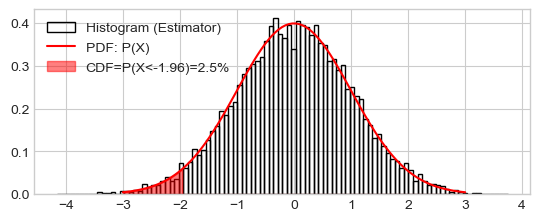

In [15]:
_ = plt.hist(x_rv, density=True, bins=100, fill=False,
             label="Histogram (Estimator)")
_ = plt.plot(x_range, pdf_x_range, 'r-', label="PDF: P(X)")

# PPF: Values such P(X < values) = 2.5%
percentile_of_cdf = 0.025
x_for_percentile_of_cdf = scipy.stats.norm.ppf(percentile_of_cdf,
                                                loc=mean, scale=sd)

x_range = np.linspace(mean-3*sd, mean+3*sd, 10000)
pdf_x_range = scipy.stats.norm.pdf(x_range, loc=mean, scale=sd)
pdf_x_range[x_range > x_for_percentile_of_cdf] = 0 
_ = plt.fill_between(x=x_range, y1=np.zeros(len(pdf_x_range)), y2=pdf_x_range, alpha=.5,
                     label="CDF=P(X<{:.02f})={:.01%}".format(x_for_percentile_of_cdf,
                                                        percentile_of_cdf),
                     color='r')
_ = plt.legend()

### The Chi-Square Distribution

The chi-square or $\chi_n^2$ distribution with $n$ degrees of freedom (df) is the distribution of a sum of the squares of $n$ independent standard normal random variables $\mathcal{N}(0, 1)$. Let $X \sim \mathcal{N}(\mu, \sigma^2)$, then, $Z=(X - \mu)/\sigma \sim \mathcal{N}(0, 1)$, then:

- The squared standard $Z^2 \sim \chi_1^2$ (one df).

- **The distribution of sum of squares** of $n$ normal random variables: $\sum_i^n Z_i^2 \sim \chi_n^2$

The sum of two $\chi^2$ RV with $p$ and $q$ df is a $\chi^2$ RV with $p+q$ df. This is useful when summing/subtracting sum of squares.

The $\chi^2$-distribution is used to model **errors** measured as **sum of squares** or the distribution of the sample **variance**.

The chi-squared distribution is a special case of the gamma distribution, with gamma parameters a = df/2, loc = 0 and scale = 2.

Documentation:
- [numpy.random.chisquare](https://numpy.org/doc/stable/reference/random/generated/numpy.random.chisquare.html)
- [scipy.stats.chi2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2)

In [16]:
df, mean, sd, n = 30, 0, 1, 10000
x_rv = scipy.stats.chi2.rvs(df=df, loc=mean, scale=sd, size=n)
x_range = np.linspace(mean-3*sd, mean+3*sd, 100)
prob_x_range = scipy.stats.chi2.pdf(x_range, df=df, loc=mean, scale=sd)
cdf_x_range = scipy.stats.chi2.cdf(x_range, df=df ,loc=mean, scale=sd)

### The Fisher's F-Distribution

The $F$-distribution, $F_{n, p}$, with $n$ and $p$ degrees of freedom is the ratio of two independent $\chi^2$ variables. Let $X \sim \chi_n^2$ and $Y \sim \chi_p^2$ then: 
$$
    F_{n, p} = \frac{X/n}{Y/p}
$$

The $F$-distribution plays a central role in hypothesis testing answering the question: **Are two variances equals?, is the ratio or two errors significantly large ?**.

Documentation:
- [scipy.stats.f](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html#scipy.stats.f)


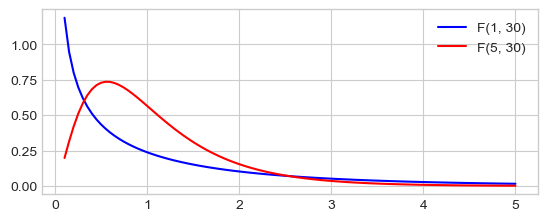

In [17]:
dfn, dfd, mean, sd, n = 30, 5, 0, 1, 10000
x_rv = scipy.stats.f.rvs(dfn=dfn, dfd=dfd, loc=mean, scale=sd, size=n)
x_range = np.linspace(mean-3*sd, mean+3*sd, 100)
prob_x_range = scipy.stats.f.pdf(x_range, dfn=dfn, dfd=dfd, loc=mean, scale=sd)
cdf_x_range = scipy.stats.f.cdf(x_range, dfn=dfn, dfd=dfd, loc=mean, scale=sd)

fvalues = np.linspace(.1, 5, 100)
# pdf(x, df1, df2): Probability density function at x of F.
plt.plot(fvalues, scipy.stats.f.pdf(fvalues, 1, 30), 'b-', label="F(1, 30)")
plt.plot(fvalues, scipy.stats.f.pdf(fvalues, 5, 30), 'r-', label="F(5, 30)")
_ = plt.legend()

### The Student's $t$-Distribution

Let $M \sim \mathcal{N}(0, 1)$ and $V \sim \chi_n^2$. The $t$-distribution, $T_n$, with $n$ degrees of freedom is the ratio:
$$
    T_n = \frac{M}{\sqrt{V/n}}
$$

The distribution of the difference between an estimated parameter and its true (or assumed) value divided by the standard deviation of the estimated parameter (standard error) follow a $t$-distribution.

Documentation: [scipy.stats.t](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t)


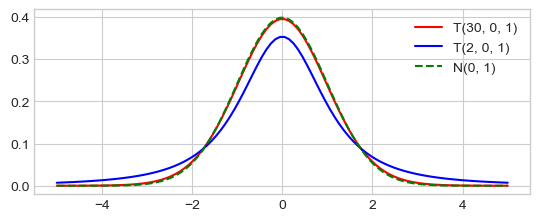

In [18]:
df, mean, sd, n = 30, 0, 1, 10000
x_rv = scipy.stats.t.rvs(df=df, loc=mean, scale=sd, size=n)
x_range = np.linspace(mean-5*sd, mean+5*sd, 100)
prob_x_range = scipy.stats.t.pdf(x_range, df=df, loc=mean, scale=sd)
cdf_x_range = scipy.stats.t.cdf(x_range, df=df, loc=mean, scale=sd)

plt.plot(x_range, scipy.stats.t.pdf(x_range, 30), 'r-', label="T(30, 0, 1)")
plt.plot(x_range, scipy.stats.t.pdf(x_range, 2), 'b-', label="T(2, 0, 1)")
plt.plot(x_range, scipy.stats.norm.pdf(x_range, loc=mean, scale=sd), 'g--',
         label="N(0, 1)")
_ = plt.legend()

## Central Limit Theorem (CLT)

See [3Blue1Brown: But what is the Central Limit Theorem?](https://www.youtube.com/watch?v=zeJD6dqJ5lo).

Let $\{X_1, ..., X_i,..., X_n\}$ be a sequence of independent and identically distributed (i.i.d.) ($\sim X$) random variables (RV) with parameters:

- $E[X_i] = \mu_X$,
- $Var[X_i] = \sigma_X^2 < \ \infty$ (finite variance).

### Distribution of the Sum of Samples

Let $S_n = \sum^n_i X_i$ the sum of those RV. Then, the sum of RV converge in distribution to a normal distribution:

$$
S_n = \frac{\sum^n_i X_i}{n} \rightarrow \mathcal{N}(n \mu_X, \sqrt{n}\sigma_X)
$$

Note that the centered and scaled sum converge in distribution to a normal distribution of parameters $0, 1$: $\frac{\sum^n_i X_i -n\mu}{\sqrt{n}\sigma_X}\rightarrow\mathcal{N}(0, 1)$

### Examples

**Distribution of the sum of samples from the uniform distribution**

See [Scipy Uniform Distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)

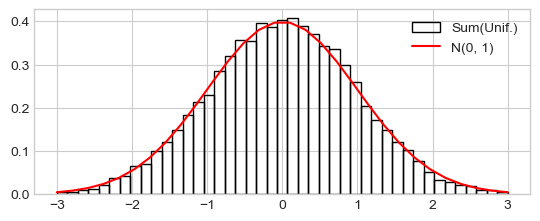

In [19]:
n_sample = 1000
n_repeat = 10000

# Distribution parameters, true mean and standard deviation
a, b = 0, 1
mu_unif, sd_unif = 1 / 2 * (b - a), np.sqrt(1 / 12 * (b - a) ** 2)

# Xn's
xn_s = np.array([scipy.stats.uniform.rvs(size=n_sample).sum() for i in range(n_repeat)])

# Xn's centered and scaled
xn_s_cs =  (xn_s - n_sample * mu_unif) / (np.sqrt(n_sample) * sd_unif) 

h_ = plt.hist(xn_s_cs, range=(-3, 3), density=True, bins=43, fill=False,
             label="Sum(Unif.)")

# Normal distribution
x_range = np.linspace(-3, 3, 30)
prob_x_range = scipy.stats.norm.pdf(x_range, loc=0, scale=1)
plt.plot(x_range, prob_x_range, 'r-', label="N(0, 1)")
_ = plt.legend()

**Distribution of the sum of samples from the the exponential distribution**

See [Scipy Exponential Distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html)

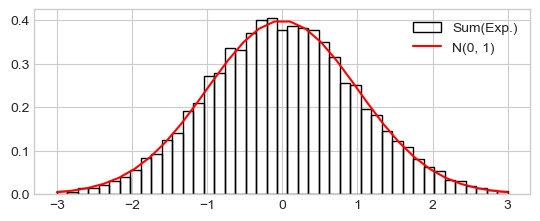

In [20]:
n_sample = 1000
n_repeat = 10000

# Distribution parameters, true mean and standard deviation
lambda_ = 1
mu_exp, sd_exp = 1 / lambda_ , np.sqrt(1 / (lambda_ ** 2))

# Xn's
xn_s = np.array([scipy.stats.expon.rvs(size=n_sample).sum() for i in range(n_repeat)])

# Xn's centered and scaled
xn_s_cs =  (xn_s - n_sample * mu_exp) / (np.sqrt(n_sample) * sd_exp) 

h_ = plt.hist(xn_s_cs, range=(-3, 3), density=True, bins=43, fill=False,
             label="Sum(Exp.)")

# Normal distribution
x_range = np.linspace(-3, 3, 30)
prob_x_range = scipy.stats.norm.pdf(x_range, loc=0, scale=1)
plt.plot(x_range, prob_x_range, 'r-', label="N(0, 1)")
_ = plt.legend()

### The Distribution of the Sample Mean

Central Limit Theorem also apply for the sample mean:
Let i.i.d. samples $X_i$ from from *almost any* distribution of parameters $\mu_X, \sigma_X$. Then the sample mean $\bar{X}$, for samples of size 30 or more, is approximately normally distributed:

$$
\bar{X} = \frac{\sum^n_i X_i}{n} \rightarrow \mathcal{N}(\mu_X, \frac{\sigma_X}{\sqrt{n}})
$$

Simple but useful demonstrations:

\begin{align*}
E[\bar{X}_n] = & E[\frac{1}{n}\sum^n_i X_i]\\
& \frac{1}{n} \sum^n_i E[X_i], X_i~\text{are i.i.d., i.e., }~E[X_i] = \mu_X \forall i\\
& \frac{1}{n}  n \mu_X\\
&  \mu_X\\
\end{align*}

\begin{align*}
Var[\bar{X}_n] = & Var[\frac{1}{n}\sum^n_i X_i] \\
& (\frac{1}{n})^2  \sum^2_X, X_i~\text{are i.i.d., i.e., }~Var[X_i] = \sigma^2_X \forall i\\
& (\frac{1}{n})^2  n \sigma^2_X\\
& \sigma_X^2/n\\
Sd[\bar{X}_n] = & \sigma_X/\sqrt{n}
\end{align*}

Note that the **standard deviation of the sample mean is the standard deviation of the parent RV scaled by** $\sqrt{n}$. The larger the sample size, the better the approximation.

The Central Limit Theorem is illustrated for several common population distributions in [The Sampling Distribution of the Sample Mean](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Introductory_Statistics_(Shafer_and_Zhang)/06%3A_Sampling_Distributions/6.02%3A_The_Sampling_Distribution_of_the_Sample_Mean).



**Distribution of the mean from the Binomial distribution**


[Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) with [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html):


In [21]:
n_sample = 1000
n_repeat = 10000

# Binomial distribution parameters
n, p = n_sample, 0.5

# Distribution parameters, true mean and standard deviation
mu, sd = n * p , np.sqrt(n * p * (1 - p))

# Xbar's
xbar_s = np.array([scipy.stats.binom.rvs(n=n, p=p, size=n_sample).mean()
                   for i in range(n_repeat)])

print("True stat.: mu={:.01f}, sd={:.03f}".format(mu, sd / np.sqrt(n_sample)))
print("Est. stat.: mu={:.01f}, sd={:.03f}".format(xbar_s.mean(), xbar_s.std()))


True stat.: mu=500.0, sd=0.500
Est. stat.: mu=500.0, sd=0.504


## Statistical inference and Decision Making using Hypothesis Testing


[Inferential statistics](https://en.wikipedia.org/wiki/Statistical_inference) involves the use of a sample (1) to estimate some characteristic in a large population; and (2) to test a research hypothesis about a given population.

### Typology of tests

Tests should be adapted to the type of variable:

1. For **categorical variables** tests use **count** of categories, **proportions, or frequencies**. Examples:

- Test a proportion: 200 heads have been found over 300 flips, is this coin biased toward head or could it be observed by chance?
- 1,000 voters are questioned about their vote. 55% said they had voted for candidate A and 45% for candidate B. Is this a significant difference?

2. For **numerical variables tests use means, standard-deviations or medians**. Examples:

- Test the effect of some condition (treatment or some action):
   * We observed an increase of monthly revenue of 100 stores after marketing campaign. Could this increase be attributed to chance or to the marketing campaign?
   * Arterial hypertension of 50 patients has been reduced by some medication. Is it pure randomness?

- Test the association between two variables:
    * Height and sex: In a sample of 25 individuals (15 females, 10 males), is female height is different from male height?
    * Age and arterial hypertension: In a sample of 25 individuals is age height correlated with arterial hypertension ?

Tests can be grouped in two categories:

1. **Parametric tests** assume that the data follow some distribution, and can be summarized by a parameters: mean and standard-deviation for quantitative variables; count proportion or frequencies for categorical variables.

2. **Non-Parametric tests**. Non-parametric tests are not based on a model of the data and therefore do not make the assumption that they follow a certain distribution. Non-Parametric tests are generally based on ranking of values or medians.

### General Testing Procedure

#### 1. **Model the data** (for parametric tests).

E.g., the height of males and females can be represented by their means, i.e., assuming two normal distributions. Then fit the model to the data, i.e., estimate the model parameters (frequency, mean, correlation, regression coefficient). E.g., compute the means of females and males height.

#### 2. Calculate a **decision statistic** (for all tests)

- Formulate the null hypothesis $H_0$, i.e., what would be situation under pure chance? E.g., if sex has no effect on individuals' height males and females means height will be equals.

- Derive a test statistic on the data capturing deviation from null hypothesis taking account the number of samples. For parametric statistics, the test statistic is derived from model parameters, e.g., the differences of means of males and females height, taking account the number of samples.

#### 3. Inference

Assess the deviation of the test statistic from its expected value under $H_0$ (pure chance). Two possibilities:

**P-value** based on null hypothesis:

What is the probability that the computed test statistic $\bar{X}$ would be observed under pure chance? I.e.,  What is the probability that the test statistics under $H_0$ would be more extreme, i.e., "larger" or "smaller" than $\bar{X}$?
* Calculate the distribution of test statistic $X$ under $H_0$.
* Compute the probability (P-value) to obtain a larger test statistic by chance (under the null hypothesis).

For a symmetric distribution the two sided p-value $P$ is defined as: 
- $P(\bar{X} \leq X | H_0) = P/2$, or
- $P(X \geq \bar{X}) = P/2$

$\bar{X}$ is declared to be **significantly different to the null hypothesis** if the p-value is less than a **significance level** $\alpha$ generally considered as $5\%$.

**Confidence interval (CI)**

CI is a range of values $x_1, x_2$ that is likely (given a **confidence level**, e.g., $95\%$) to contain the true value of the statistic $\bar{X}$. Outside this range the value is considered to be unlikely. Note that the confidence level is $1 - \alpha$, the significance level.
See [Interpreting Confidence Intervals](https://www.youtube.com/watch?v=ftYdEm6pEkE)

The 95% CI (Confidence Interval) is the range of values $x_1, x_2$ such
$P(x_1 < \bar{X} < x_2) = 95\%$. 

For a symmetric distribution the two sided $95\% (= 1 - 5\%)$ confidence interval, is defined as: 
- $x_1$ such $P(\bar{X} \leq x_1) = 2.5\% =5\%/2$
- $x_2$ such $P(x_2 \leq \bar{X}) = 2.5\%$

Terminology

- Margin of error = $\bar{X} - x_1$ (for symmetric distribution).
- Confidence Interval = $[x_1, x_2]$.
- Confidence level is 1 - significance level

### Categorical variable: the Binomial Test


**Simplified example (small sample)** of the [the binomial test](https://en.wikipedia.org/wiki/Binomial_test): Three voters are questioned about their vote. Two voted for candidate A and one for B. How likely this difference Is this a significant difference, 

**1. Model the data:** Let $x$ the number of vote for A. It follows a [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution). Compute the model parameters: $N=3$, and $\hat{p}=2/3$ (the frequency of number of vote A over the number of voters).

**2. Compute a test statistic** measuring the deviation of the number of vote for A ($x=2$) over three voters from the expected values under the null hypothesis where $x$ would be $1.5$. Similarly, we could consider the deviation of the observed proportion $\hat{p}=2/3$ from $\pi_0=50\%$.

**3. To make inference**, we have to compute the probability to obtain more than two votes for A by chance. We need the distribution of $x$ under $H_0$ ($P(x|H0)$) to sum all the probabilities where $x$ is larger or equal to 2, i.e., $P(x\geq 2| H_0)$. With such small sample size ($n=3$) this distribution is obtained by enumerating all configurations that produce a given number of heads $x$:


| 1 | 2 | 3 | count vote for A |
|---|---|---|------------------|
|   |   |   | 0                |
| H |   |   | 1        |       |
|   | H |   | 1                |
|   |   | H | 1                |
| H | H |   | 2                |
| H |   | H | 2                |
|   | H | H | 2                |
| H | H | H | 3                |


Eight possibles configurations, probabilities of different values for $x$ are:

- $P(x=0) = 1/8$
- $P(x=1) = 3/8$
- $P(x=2) = 3/8$
- $P(x=3) = 1/8$

Plot of the distribution of the number of $x$ (A vote over  3 voters) under the null hypothesis:

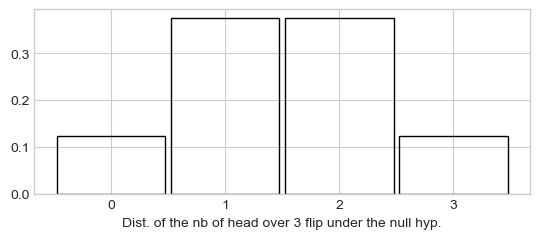

In [22]:
plt.bar([0, 1, 2, 3], [1/8, 3/8, 3/8, 1/8], width=.95, fill=False)
_ = plt.xticks([0, 1, 2, 3], [0, 1, 2, 3])
_ = plt.xlabel("Dist. of the nb of head over 3 flip under the null hyp.")

Finally, we compute the probability (P-value) to observe a value larger or equal that $x=2$ (or $P=2/3$) under the null hypothesis?
This probability is the $p$-value:
$$
P(x\geq 2| H_0) = P(x=2| H_0) + P(x=3| H_0) = 3/8 + 1/8 = 1/2
$$

**P-value = 0.5**, meaning that there is 50\% of chance to get $x=2$ or larger by chance.

**large sample example:** 100 voters are questioned about their vote. 60 declared they voted for candidate A and 40 for candidate B. Is this a significant difference?

**1. Model the data:** Let $x$ the number of vote for A. $x$ follows a binomial distribution. Compute model parameters: $n=100, \hat{p}=60/100$. Where $\hat{p}$ is the observed proportion of A.

**2. Compute a test statistic** that measure the deviation of $x=60$ (vote for A) from the expected value: $n\pi_0=50$ under the null hypothesis, i.e., where $\pi_0=50\%$. The distribution of the number of vote for A ($x$) follow the  [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) of parameters $N=100, P=0.5$ approximated with normal distribution when $n$ is large enough.

For large sample, the most usual (and easiest) approximation is through the standard normal distribution, in which a z-test is performed of the test statistic $Z$, given by:
$$
Z = \frac{x - n\pi_0}{\sqrt{n p_0 (1 - \pi_0)}}
$$
one may rearrange and write the z-test above as deviation of $\hat{p}$ from $\pi_0=50\%$
$$
Z = \frac{\hat{p} - \pi_0}{\sqrt{\pi_0 (1 - \pi_0)}}\sqrt{n}
$$

Note that the statistic is the product of two parts:

- The **effect size**: $\frac{\hat{p} - \pi_0}{\sqrt{\pi_0 (1 - \pi_0)}}$ that measure a standardized deviation.
- The squared root of the sample size $\sqrt{n}$.

Large statistic is obtained with large deviation with large sample size.

**5. Inference**

Compute the p-value using [Scipy to compute the CDF](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html) of the binomial distribution:

In [23]:
n, k, pi0 = 100, 60, 0.5
pval_greater = 1 - scipy.stats.binom.cdf(k, n, pi0)
pval_greater = scipy.stats.binom.sf(k, n, pi0)

# Two sidded pval = 2 * pval_greater
pval = pval_greater * 2
print("P-value (Two sided): P(X<={:0d} or X>={:0d}|H0)={:.4f}".format(n-k, k, pval))

P-value (Two sided): P(X<=40 or X>=60|H0)=0.0352


[Scipy normal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [24]:
n = 100
z = (0.6 - 0.5) / (0.5 * (1 - 0.5)) * np.sqrt(n)
#z = (60 - n * 0.5 + 1/2) / (n * 0.5 * (1 - 0.5)) * np.sqrt(n)

scipy.stats.norm.sf(z, loc=0) * 2

np.float64(6.334248366623996e-05)

Plot of the binomial distribution and the probability to observe more than 60 vote for A by chance:

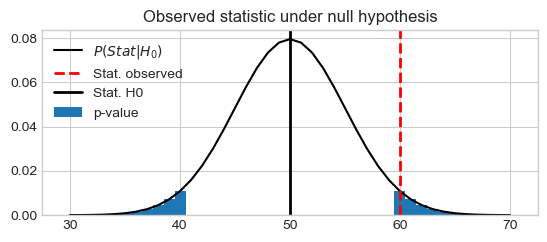

In [25]:

stat_vals = np.linspace(30, 70, 41)
stat_probs = scipy.stats.binom.pmf(stat_vals, n, pi0) # H0: 0.5
stat_obs = k

pystatsml.plot_utils.plot_pvalue_under_h0(stat_vals, stat_probs,
                                          stat_obs=60, stat_h0=50,
                                          thresh_low=40, thresh_high=60)

Simply use [Scipy binomial test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binomtest.html) that the probability of success is p.

In [26]:
test = scipy.stats.binomtest(k=k, n=n, p=pi0, alternative='two-sided')
ci_low, ci_high = test.proportion_ci(confidence_level=0.95, method='exact')

print("Estimate: {:.2f}, p-val: {:e}, CI: [{:.5f}, {:.5f}]".\
    format(test.statistic, test.pvalue, ci_low, ci_high))

Estimate: 0.60, p-val: 5.688793e-02, CI: [0.49721, 0.69671]


### Quantitative variable: One Sample T-test

The [one sample t-test](https://en.wikipedia.org/wiki/Student%27s_t-test#One-sample_t-test) is used to determine whether a sample comes from a population with a specific mean. For example you want to test if the average height of a population is $1.75~m$.

This test is used when we have two measurements for each individual at two different times or under two conditions: for each individual, we calculate the difference between the two conditions and test the positivity (increase) or negativity (decrease) of the mean of the differences.

Example: is the arterial hypertension of 50 patients measured before and after some medication has been reduced by the treatment?


Example: [Monthly revenue figures of for 100 stores before and after a marketing campaigns](https://julius.ai/use-case/how-to-perform-a-paired-samples-t-test). We compute the difference ($x_i = x_i^\text{after} - x_i^\text{before}$) for each store $i$.
If the average difference $\bar{x}=1/n \sum_i x_i$ is significantly positive (resp. negative), then the marketing campaigns will be considered as efficient (resp. detrimental).

In [27]:
df = pd.read_csv("../datasets/Monthly Revenue (in thousands).csv")
print(df.head())
df = df.pivot(index='store_id', columns='time', values='revenue')
# Keep only the 30 first samples
df = df[:30]
df.after -= 3 # force to smaller effect size
print(df.head())
x = df.after - df.before

   store_id    time   revenue
0         1  before  54.96714
1         2  before  48.61736
2         3  before  56.47689
3         4  before  65.23030
4         5  before  47.65847
time         after    before
store_id                    
1         49.89029  54.96714
2         48.51413  48.61736
3         56.76331  56.47689
4         63.21891  65.23030
5         48.85204  47.65847



**1. Model the data (parametric test)**

We model the observation as the sample mean $\bar{x}$ plus some error $\varepsilon_i$, i.e., $x_i = \bar{x} + \varepsilon_i$
The $\varepsilon_i$ are called the **residuals**.

Assumptions:

- The $x_i$'s are not expected to follow a normal distribution. But the $\varepsilon_i$ should be approximately normally distributed.
- The $\varepsilon_i$  must be independent and identically distributed $i.i.d.$.
 
Indeed according to the central limit theorem, if the sampling of the parent population $x$ is independent then the sample mean $\bar{x}$ will be approximately normal.

Fit: estimate the model parameters, the mean $\bar{x}=1/n \sum_i x_i=2.26$ (thousands of dollars) and standard deviation $s$.
Warning, when computing the std or the variance, set `ddof=1`. The default value, `ddof=0`, leads to the biased estimator of the variance.

In [28]:
xbar = np.mean(x)      # sample mean
mu0 = 0                # mean under H0
s = np.std(x, ddof=1)  # sample standard deviation
n = len(x)             # sample size
df = n - 1

**2. Compute a test statistic** 

- Formulate hypothesis:

  * Null hypothesis: $H_0: \bar{x}=0$, i.e., the marketing campaign had no effect on sales.
  * Alternative hypothesis: $H_0: \bar{x}\neq 0$, i.e., the marketing campaign had positive ($\bar{x}>0$) or negative effect ($\bar{x}<0$) on sales.
  
  Note that is is a **two-sided test** of effects on both ways.

- Compute a test statistic that measure the deviation of $\bar{x}=2.26$ from the expected value under the null hypothesis (no effect of the campaign) which is: $\mu_0=0$. The test statistic $T$, is given by:
$$
T = \frac{\bar{x} - \mu_0}{s}\sqrt{n}
$$

Note that the statistic is the product of two parts:

- The **effect size**: $\frac{\bar{x} - \mu_0}{s}$ that measure a standardized deviation. It a "signal to noise ratio" of what is explained by the model divided by the error.

- The squared root of the sample size.

Under the null hypothesis the distribution of T follow the [Student t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) of parameters df=$n-1$.
Note that according the central limit theorem, if the observations are independent, then $T$ will be approximately normal $\mathcal{N}(0,1)$.

In [29]:
tval = (xbar - mu0) / s * np.sqrt(n)

**3. Inference**

**P-value (null hypothesis)** is computed using [Scipy to compute the CDF](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) of the student distribution.

In [30]:
pval_greater = 1 - scipy.stats.t.cdf(tval, df)
pval_greater = scipy.stats.t.sf(tval, df)
# T distribution is symmetric
# => pval_lower = pval_greater
# => two-sided = pval_greater * 2
pval = 2 * pval_greater

Plot observed T value under null hypothesis

- the distribution of t-statistic under the null hypothesis $P_{T}(X|H_0)$,
- the two sided p-value, CDF of $P_{T}(X\leq-T) + P_{T}(X\geq T|H_0)$, and
- the observed $T$ value

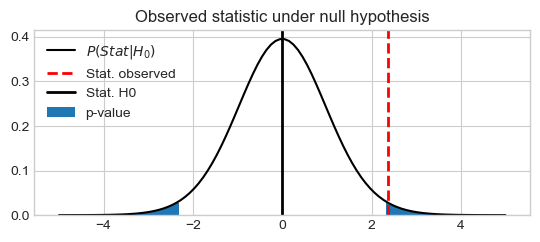

In [31]:
stat_vals = np.linspace(-5, 5, 100)
stat_probs = scipy.stats.t.pdf(x=stat_vals, df=df, loc=0) # H0 => loc=0

pystatsml.plot_utils.plot_pvalue_under_h0(stat_vals, stat_probs,
                                          stat_obs=tval, stat_h0=0,
                                          thresh_low=-tval, thresh_high=tval)

**Confidence interval (alternative hypothesis)** of the observed estimate $\bar{x}$ is given by:
$$
\bar{x} \pm t_{\alpha/2}\frac{s}{\sqrt{n}}
$$
Where $t_{\alpha/2}$ is the statistic critical value, obtained by the the CMF of the t-distribution with $n-1$ degrees of freedom.

Use the Percent Point Function [PPF](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t) or quantile function of the to compute the critical value .

See [Confidence Interval for a population mean, t distribution](https://www.youtube.com/watch?v=6r5IZCjvIHI).


In [32]:
# Critical value for t at alpha / 2:
t_alpha2 = -scipy.stats.t.ppf(q=0.05/2, df=df, loc=0)

ci_low  = xbar - t_alpha2 * s / np.sqrt(n)
ci_high = xbar + t_alpha2 * s / np.sqrt(n)

print("Estimate: {:.2f}, t-val: {:.2f}, p-val: {:e}, df: {}, CI: [{:.5f}, {:.5f}]".\
    format(xbar, tval, pval, df, ci_low, ci_high))

Estimate: 2.26, t-val: 2.36, p-val: 2.500022e-02, df: 29, CI: [0.30515, 4.22272]


Simply use [Scipy one sample t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)

In [33]:
ttest = scipy.stats.ttest_1samp(x, 0, alternative='two-sided')
ci_low, ci_high = ttest.confidence_interval()

print("Estimate: {:.2f}, t-val: {:.2f}, p-val: {:e}, df: {}, CI: [{:.5f}, {:.5f}]".\
    format(ttest._estimate, ttest.statistic, ttest.pvalue, ttest.df, ci_low, ci_high))

Estimate: 2.26, t-val: 2.36, p-val: 2.500022e-02, df: 29, CI: [0.30515, 4.22272]


[Boostraping for Confidence Intervals](https://www.youtube.com/watch?v=TqOeMYtOc1w)

## Statistical Tests of Pairwise Associations

Univariate statistical analysis: explore association betweens pairs of variables.


- In statistics, a **categorical variable** or **factor** is a variable that can take on one of a limited, and usually fixed, number of possible values, thus assigning each individual to a particular group or "category". The levels are the possibles values of the variable. Number of levels = 2: binomial; Number of levels > 2: multinomial. There is no intrinsic ordering to the categories.  For example, gender is a categorical variable having two categories (male and female) and there is no intrinsic ordering to the categories. For example, Sex (Female, Male), Hair color (blonde, brown, etc.).

- An **ordinal variable** is a categorical variable with a clear ordering of the levels. For example: drinks per day (none, small, medium and high).

- A **continuous** or **quantitative variable** $x \in \mathbb{R}$ is one that can take any value in a range of possible values, possibly infinite.  E.g.: salary, experience in years, weight.

[What statistical test should I use?](http://www.ats.ucla.edu/stat/mult_pkg/whatstat/)

![Statistical tests](images/stat_tests_flowchart.png)


### Pearson Correlation: Test Association Between Two Quantitative Variables

Test the correlation coefficient of two quantitative variables. The test calculates a Pearson correlation coefficient and the $p$-value for testing non-correlation.

Let $x$ and $y$ two quantitative variables, where $n$ samples were obeserved. The linear correlation coeficient is defined as :

$$r=\frac{\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{\sqrt{\sum_{i=1}^n(x_i-\bar x)^2}\sqrt{\sum_{i=1}^n(y_i-\bar y)^2}}.$$

Under $H_0$, the test statistic $t=\sqrt{n-2}\frac{r}{\sqrt{1-r^2}}$ follow Student distribution with $n-2$ degrees of freedom.

In [34]:
n = 50
x = np.random.normal(size=n)
y = 2 * x + np.random.normal(size=n)

# Compute with scipy
cor, pval = scipy.stats.pearsonr(x, y)
print(cor, pval)

0.8838265556020786 1.8786054559764617e-17


### Two sample (Student) T-test: Compare Two Means

![Two-sample model](images/model_two-sample.png){width=7cm}

The two-sample $t$-test (Snedecor and Cochran, 1989) is used to determine if two population means are equal. There are several variations on this test.
If data are paired (e.g. 2 measures, before and after treatment for each individual) use the one-sample $t$-test of the difference. The variances of the two samples may be assumed to be equal (a.k.a. homoscedasticity) or unequal (a.k.a. heteroscedasticity).

1. Model the data

Assumptions:

- Independence of **residuals** ($\varepsilon_i$). This assumptions **must** be satisfied.
- Normality of residuals. Approximately normally distributed can be accepted.
- Homosedasticity use T-test, Heterosedasticity use Welch t-test.

Assume that the two random variables are normally distributed: $y_1 \sim \mathcal{N}(\mu_{1}, \sigma_{1}), y_2 \sim \mathcal{N}(\mu_{2}, \sigma_2)$.

Fit: estimate the model parameters, means and variances: $\bar{y_1}, s^2_{y_1}, \bar{y_2}, s^2_{y_2}$.

2. t-test

The general principle is 

\begin{align*}
t &= \frac{\text{difference of means}}{\text{standard dev of error}} = \frac{\bar{y_1}-\bar{y_2}}{s_{\bar{y_1}-\bar{y_2}}}\\
  &= \frac{\bar{y_1}-\bar{y_2}}{\sqrt{\sum\varepsilon^2}}\sqrt{n-2}
\end{align*}

Since $y_1$ and $y_2$ are independant:

\begin{align}
s^2_{\bar{y_1}-\bar{y_2}} &= s^2_{\bar{y_1}} + s^2_{\bar{y_2}} = \frac{s^2_{y_1}}{n_1} + \frac{s^2_{y_2}}{n_2}\\
\text{thus}\\
s_{\bar{y_1}-\bar{y_2}} &= \sqrt{\frac{s^2_{y_1}}{n_1} + \frac{s^2_{y_2}}{n_2}}
\end{align}

#### Equal or unequal sample sizes, unequal variances (Welch's $t$-test)

Welch's $t$-test defines the $t$ statistic as

$$
t = \frac{\bar{y_1} - \bar{y_2}}{\sqrt{\frac{s^2_{y_1}}{n_1} + \frac{s^2_{y_2}}{n_2}}}.
$$

To compute the $p$-value one needs the degrees of freedom associated with this variance estimate. It is approximated using the Welch–Satterthwaite equation:

$$
\nu \approx \frac{\left(\frac{s^2_{y_1}}{n_1} + \frac{s^2_{y_2}}{n_2}\right)^2}{\frac{s^4_{y_1}}{n_1^2(n_1-1)} + \frac{s^4_{y_2}}{n_2^2(n_2-1)}}.
$$

#### Equal or unequal sample sizes, equal variances

If we assume equal variance (ie, $s^2_{y_1} = s^2_{y_1} = s^2$), where $s^2$ is an estimator of the common variance of the two samples:

\begin{align}
s^2 &= \frac{s_{y_1}^2(n_1-1)+s_{y_2}^2(n_2-1)}{n_1+n_2-2}\\
    &= \frac{\sum_i^{n_1} (y_{1i} -\bar{y_1})^2 + \sum_j^{n_2} (y_{2j} -\bar{y_2})^2}{(n_1 - 1) + (n_2 - 1)}
\end{align}


then

$$
s_{\bar{y_1}-\bar{y_2}} = \sqrt{\frac{s^2}{n_1} + \frac{s^2}{n_2}} = s \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}
$$

Therefore, the $t$ statistic, that is used to test whether the means are different is:

$$
t = \frac{\bar{y_1} - \bar{y_2}}{s \cdot \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}},
$$

#### Equal sample sizes, equal variances

If we simplify the problem assuming equal samples of size $n_1 = n_2 = n/2$ we get

\begin{align}
t &= \frac{\bar{y_1} - \bar{y_2}}{s} \cdot \sqrt{n}\\
&\approx \frac{\text{difference of means}}{\text{standard deviation of the noise}} \cdot \sqrt{n} = &\approx \text{effect size} \cdot \sqrt{n}
\end{align}


#### Example

Given the following two samples, test whether their means are equal using the **standard t-test, assuming equal variance**.

In [35]:
height = np.array([1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87,
                   1.66, 1.71, 1.73, 1.64, 1.70, 1.60, 1.79, 1.73, 1.62, 1.77])

grp = np.array(["M"] * 10 + ["F"] * 10)

# Compute with scipy
ttest = scipy.stats.ttest_ind(height[grp == "M"], height[grp == "F"], equal_var=True)

print("Estimate: {:.2f}, t-val: {:.2f}, p-val: {:e}, df: {}".\
    format(ttest._estimate, ttest.statistic, ttest.pvalue, ttest.df))

Estimate: 0.12, t-val: 3.55, p-val: 2.282089e-03, df: 18.0


### ANOVA F-test: Quantitative as a function of Categorical Factor with Three Levels or More

Analysis of variance (ANOVA) provides a statistical test of whether or not the means of several (k) groups are equal, and therefore generalizes the $t$-test to more than two groups. ANOVAs are useful for comparing (testing) three or more means (groups or variables) for statistical significance. It is conceptually similar to multiple two-sample $t$-tests, but is less conservative.

Here we will consider one-way ANOVA with one independent variable, ie one-way anova.

[Wikipedia](https://en.wikipedia.org/wiki/F-test):

- Test if any group is on average superior, or inferior, to the others versus the null hypothesis that all four strategies yield the same mean response

- Detect any of several possible differences.

- The advantage of the ANOVA $F$-test is that we do not need to pre-specify which strategies are to be compared, and we do not need to adjust for making multiple comparisons.

- The disadvantage of the ANOVA $F$-test is that if we reject the null hypothesis, we do not know which strategies can be said to be significantly different from the others.


1. Model the data

Assumptions

- The samples are randomly selected in an independent manner from the k populations.
- All k populations have distributions that are approximately normal. Check by plotting groups distribution.
- The k population variances are equal. Check by plotting groups distribution.

The question is: Is there a difference in Petal Width in species from iris dataset?
Let $y_1, y_2$ and $y_3$ be Petal Width in three species.

Here we assume (see assumptions) that the three populations were sampled from three random variables that are normally distributed. I.e., $Y_1 \sim N(\mu_1, \sigma_1), Y_2 \sim N(\mu_2, \sigma_2)$ and $Y_3 \sim N(\mu_3, \sigma_3)$.

**2. Fit: estimate the model parameters**

Estimate means and variances: $\bar{y}_i, \sigma_i,\;\; \forall i \in \{1, 2, 3\}$.

**3. $F$-test**

The formula for the one-way ANOVA F-test statistic is

\begin{align}
F &= \frac{\text{Explained variance}}{\text{Unexplained variance}}\\
&=\frac{\text{Between-group variability}}{\text{Within-group variability}} = \frac{s^2_B}{s^2_W}.
\end{align}


The "explained variance", or "between-group variability" is

$$
s^2_B = \sum_i n_i(\bar{y}_{i\cdot} - \bar{y})^2/(K-1),
$$

where $\bar{y}_{i\cdot}$ denotes the sample mean in the $i$th group, $n_i$ is the number of observations in the $i$th group, $\bar{y}$ denotes the overall mean of the data, and $K$ denotes the number of groups.

The "unexplained variance", or "within-group variability" is

$$
s^2_W = \sum_{ij} (y_{ij}-\bar{y}_{i\cdot})^2/(N-K), 
$$

where $y_{ij}$ is the $j$th observation in the $i$th out of $K$ groups and $N$ is the overall sample size. This $F$-statistic follows the $F$-distribution with $K-1$ and $N-K$ degrees of freedom under the null hypothesis. The statistic will be large if the between-group variability is large relative to the within-group variability, which is unlikely to happen if the population means of the groups all have the same value.

Note that when there are only two groups for the one-way ANOVA F-test, $F=t^2$ where $t$ is the Student's $t$ statistic.

#### Example with the Iris Dataset:

      Species  SepalLength  SepalWidth  PetalLength  PetalWidth
0      setosa        5.006       3.428        1.462       0.246
1  versicolor        5.936       2.770        4.260       1.326
2   virginica        6.588       2.974        5.552       2.026
      Species  SepalLength  SepalWidth  PetalLength  PetalWidth
0      setosa     0.352490    0.379064     0.173664    0.105386
1  versicolor     0.516171    0.313798     0.469911    0.197753
2   virginica     0.635880    0.322497     0.551895    0.274650


,sum_sq,df,F,PR(>F)
Species,63.212133,2.0,119.264502,1.669669e-31
Residual,38.956200,147.0,NaN,NaN


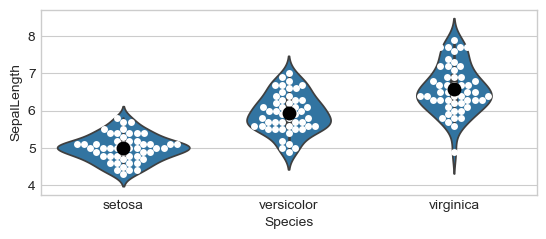

In [36]:
# Group means
means = iris.groupby("Species").mean().reset_index()
print(means)

# Group Stds (equal variances ?)
stds = iris.groupby("Species").std(ddof=1).reset_index()
print(stds)

# Plot groups
ax = sns.violinplot(x="Species", y="SepalLength", data=iris)
ax = sns.swarmplot(x="Species", y="SepalLength", data=iris,
                   color="white")
ax = sns.swarmplot(x="Species", y="SepalLength",  color="black",
                   data=means, size=10)

# ANOVA
lm = smf.ols('SepalLength ~ Species', data=iris).fit()
sm.stats.anova_lm(lm, typ=2) # Type 2 ANOVA DataFrame

### Chi-square, $\chi^2$: Categorical v.s. Categorical Factors

Computes the chi-square, $\chi^2$, statistic and $p$-value for the hypothesis test of independence of frequencies in the observed contingency table (cross-table). The observed frequencies are tested against an expected contingency table obtained by computing expected frequencies based on the marginal sums under the assumption of independence.

#### Example

20 participants: 10 exposed to some chemical product and 10 non exposed (exposed = 1 or 0). Among the 20 participants 10 had cancer 10 not (cancer = 1 or 0). $\chi^2$ tests the association between those two variables.

In [37]:
# Dataset:
# 15 samples:
# 10 first exposed
exposed = np.array([1] * 10 + [0] * 10)
# 8 first with cancer, 10 without, the last two with.
cancer = np.array([1] * 8 + [0] * 10 + [1] * 2)

crosstab = pd.crosstab(exposed, cancer, rownames=['exposed'],
                       colnames=['cancer'])
print("Observed table:")
print("---------------")
print(crosstab)

chi2, pval, dof, expected = scipy.stats.chi2_contingency(crosstab)
print("Statistics:")
print("-----------")
print("Chi2 = %f, pval = %f" % (chi2, pval))
print("Expected table:")
print("---------------")
print(expected)

Observed table:
---------------
cancer   0  1
exposed      
0        8  2
1        2  8
Statistics:
-----------
Chi2 = 5.000000, pval = 0.025347
Expected table:
---------------
[[5. 5.]
 [5. 5.]]


Computing expected cross-table

In [38]:
# Compute expected cross-table based on proportion
exposed_marg = crosstab.sum(axis=0)
exposed_freq = exposed_marg / exposed_marg.sum()

cancer_marg = crosstab.sum(axis=1)
cancer_freq = cancer_marg / cancer_marg.sum()

print('Exposed frequency? Yes: %.2f' % exposed_freq[0],
      'No: %.2f' % exposed_freq[1])
print('Cancer frequency? Yes: %.2f' % cancer_freq[0],
      'No: %.2f' % cancer_freq[1])

print('Expected frequencies:')
print(np.outer(exposed_freq, cancer_freq))

print('Expected cross-table (frequencies * N): ')
print(np.outer(exposed_freq, cancer_freq) * len(exposed))

Exposed frequency? Yes: 0.50 No: 0.50
Cancer frequency? Yes: 0.50 No: 0.50
Expected frequencies:
[[0.25 0.25]
 [0.25 0.25]]
Expected cross-table (frequencies * N): 
[[5. 5.]
 [5. 5.]]


### Non-parametric Tests of Pairwise Associations

#### Spearman Rank-Order Correlation (Quantitative vs Quantitative)

The Spearman correlation is a non-parametric measure of the monotonicity of the relationship between two datasets.

When to use it? Observe the data distribution:
- presence of **outliers**
- the distribution of the residuals is not Gaussian.

Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as $x$ increases, so does $y$. Negative correlations imply that as $x$ increases, $y$ decreases.

Non-Parametric Spearman cor test, cor: 0.5122, pval: 0.0007
Parametric Pearson cor test: cor: 0.3085, pval: 0.0528


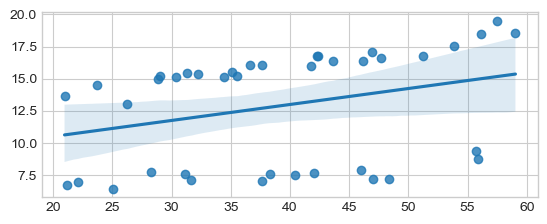

In [39]:
np.random.seed(3)

# Age uniform distribution between 20 and 40
age = np.random.uniform(20, 60, 40)

# Systolic blood presure, 2 groups:
# - 15 subjects at 0.05 * age + 6
# - 25 subjects at 0.15 * age + 10
sbp = np.concatenate((0.05 * age[:15] + 6, 0.15 * age[15:] + 10)) + \
    .5 * np.random.normal(size=40)

sns.regplot(x=age, y=sbp)

# Non-Parametric Spearman
cor, pval = scipy.stats.spearmanr(age, sbp)
print("Non-Parametric Spearman cor test, cor: %.4f, pval: %.4f" % (cor, pval))

# "Parametric Pearson cor test
cor, pval = scipy.stats.pearsonr(age, sbp)
print("Parametric Pearson cor test: cor: %.4f, pval: %.4f" % (cor, pval))

#### Wilcoxon Signed-Rank Rest (Quantitative vs Cte)

[Wikipedia](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test):
The Wilcoxon signed-rank test is a non-parametric statistical hypothesis test used when comparing two related samples, matched samples, or repeated measurements on a single sample to assess whether their population mean ranks differ (i.e. it is a paired difference test). It is equivalent to one-sample test of the difference of paired samples.

It can be used as an alternative to the paired Student's $t$-test, $t$-test for matched pairs, or the $t$-test for dependent samples when the population cannot be assumed to be normally distributed.

When to use it? Observe the data distribution:
- presence of outliers
- the distribution of the residuals is not Gaussian

It has a lower sensitivity compared to $t$-test. May be problematic to use when the sample size is small.

Null hypothesis $H_0$: difference between the pairs follows a symmetric distribution around zero.

In [40]:
n = 20
# Buisness Volume time 0
bv0 = np.random.normal(loc=3, scale=.1, size=n)
# Buisness Volume time 1
bv1 = bv0 + 0.1 + np.random.normal(loc=0, scale=.1, size=n)

# create an outlier
bv1[0] -= 10

# Paired t-test
print(scipy.stats.ttest_rel(bv0, bv1))

# Wilcoxon
print(scipy.stats.wilcoxon(bv0, bv1))

TtestResult(statistic=np.float64(0.7766377807752968), pvalue=np.float64(0.44693401731548044), df=np.int64(19))
WilcoxonResult(statistic=np.float64(23.0), pvalue=np.float64(0.001209259033203125))


#### Mann–Whitney $U$ test (Quantitative vs Categorical Factor with Two Levels)

In statistics, the Mann–Whitney $U$ test (also called the Mann–Whitney–Wilcoxon, Wilcoxon rank-sum test or Wilcoxon–Mann–Whitney test) is a nonparametric test of the null hypothesis that two samples come from the same population against an alternative hypothesis, especially that a particular population tends to have larger values than the other.

It can be applied on unknown distributions contrary to e.g. a $t$-test that has to be applied only on normal distributions, and it is nearly as efficient as the $t$-test on normal distributions.

In [41]:
n = 20
# Buismess Volume group 0
bv0 = np.random.normal(loc=1, scale=.1, size=n)

# Buismess Volume group 1
bv1 = np.random.normal(loc=1.2, scale=.1, size=n)

# create an outlier
bv1[0] -= 10

# Two-samples t-test
print(scipy.stats.ttest_ind(bv0, bv1))

# Wilcoxon
print(scipy.stats.mannwhitneyu(bv0, bv1))

TtestResult(statistic=np.float64(0.6104564820307219), pvalue=np.float64(0.5451934484051324), df=np.float64(38.0))
MannwhitneyuResult(statistic=np.float64(41.0), pvalue=np.float64(1.8074477738835562e-05))


## Linear Model

![Linear model](images/model_lm.png){width=5cm}


Given $n$ random samples $(y_i, x_{1i}, \ldots, x_{pi}), \, i = 1, \ldots, n$, the linear regression models the relation between the observations $y_i$ and the independent variables $x_i^p$ is formulated as

$$
    y_i = \beta_0 + \beta_1 x_{1i} + \cdots + \beta_p x_{pi} + \varepsilon_i \qquad i = 1, \ldots, n 
$$

- The $\beta$'s are the model parameters, ie, the regression coeficients.
- $\beta_0$ is the intercept or the bias.
- $\varepsilon_i$ are the **residuals**.
- **An independent variable (IV)**. It is a variable that stands alone and isn't changed by the other variables you are trying to measure. For example, someone's age might be an independent variable. Other factors (such as what they eat, how much they go to school, how much television they watch) aren't going to change a person's age. In fact, when you are looking for some kind of relationship between variables you are trying to see if the independent variable causes some kind of change in the other variables, or dependent variables. In Machine Learning, these variables are also called the **predictors**.

- A **dependent variable**. It is something that depends on other factors. For example, a test score could be a dependent variable because it could change depending on several factors such as how much you studied, how much sleep you got the night before you took the test, or even how hungry you were when you took it. Usually when you are looking for a relationship between two things you are trying to find out what makes the dependent variable change the way it does. In Machine Learning this variable is called a **target variable**.

### Assumptions

1. Independence of residuals ($\varepsilon_i$). This assumptions **must** be satisfied
2. Normality of residuals ($\varepsilon_i$). Approximately normally distributed can be accepted.

[Regression diagnostics:  testing the assumptions of linear regression](http://people.duke.edu/~rnau/testing.htm)

### Simple Regression: Test Association Between Two Quantitative Variables

Using the dataset "salary", explore the association between the dependant variable (e.g. Salary) and the independent variable (e.g.: Experience is quantitative), considering only non-managers.

In [42]:
df = salary[salary.management == 'N']

**1. Model the data**

Model the data on some **hypothesis** e.g.: salary is a linear function of the experience.

$$
    \text{salary}_i = \beta_0 + \beta~\text{experience}_i + \epsilon_i,
$$

more generally

$$
    y_i = \beta_0 + \beta~x_i + \epsilon_i
$$

This can be rewritten in the matrix form using the design matrix made of values of independant variable and the intercept:

$$
\begin{split}\begin{bmatrix}y_1 \\ y_2 \\ y_3 \\ y_4 \\ y_5  \end{bmatrix}
  =
  \begin{bmatrix}1 & x_1  \\1 & x_2  \\1 & x_3  \\1 & x_4  \\1 & x_5    \end{bmatrix}
  \begin{bmatrix} \beta_0 \\ \beta_1  \end{bmatrix}
  +
  \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \epsilon_3 \\ \epsilon_4 \\ \epsilon_5 \end{bmatrix}\end{split}
$$

- $\beta$: the slope or coefficient or parameter of the model,

- $\beta_0$: the **intercept** or **bias** is the second parameter of the model,

- $\epsilon_i$: is the $i$th error, or residual with $\epsilon \sim \mathcal{N}(0, \sigma^2)$.

The simple regression is equivalent to the Pearson correlation.

**2. Fit: estimate the model parameters**

The goal it so estimate $\beta$, $\beta_0$ and $\sigma^2$.

Minimizes the **mean squared error (MSE)** or the **Sum squared error (SSE)**. The so-called **Ordinary Least Squares (OLS)** finds $\beta, \beta_0$ that minimizes the $SSE = \sum_i \epsilon_i^2$

$$
SSE = \sum_i(y_i - \beta~x_i - \beta_0)^2
$$

Recall from calculus that an extreme point can be found by computing where the derivative is zero, i.e. to find the intercept, we perform the steps:

$$
\frac{\partial SSE}{\partial \beta_0} = \sum_i(y_i - \beta~x_i - \beta_0) = 0\\
\sum_i y_i = \beta~\sum_i x_i + n~\beta_0\\
n~\bar{y} = n~\beta~\bar{x} + n~\beta_0\\
\beta_0 = \bar{y} - \beta~\bar{x}
$$

To find the regression coefficient, we perform the steps:

$$
\frac{\partial SSE}{\partial \beta} = \sum_i x_i(y_i - \beta~x_i - \beta_0) = 0
$$

Plug in $\beta_0$:

$$
\sum_i x_i(y_i - \beta~x_i - \bar{y} + \beta \bar{x}) = 0\\
\sum_i x_i y_i - \bar{y}\sum_i x_i = \beta \sum_i(x_i - \bar{x})
$$

Divide both sides by $n$:

$$
\frac{1}{n}\sum_i x_i y_i  - \bar{y}\bar{x} = \frac{1}{n}\beta \sum_i(x_i - \bar{x})\\
\beta = \frac{\frac{1}{n}\sum_i x_i y_i  - \bar{y}\bar{x}}{\frac{1}{n}\sum_i(x_i - \bar{x})} = \frac{Cov(x, y)}{Var(x)}.
$$

y = 452.658228 x + 10785.911392,  r: 0.965370, r-squared: 0.931939,
p-value: 0.000000, std_err: 24.970021
Regression line with the scatterplot


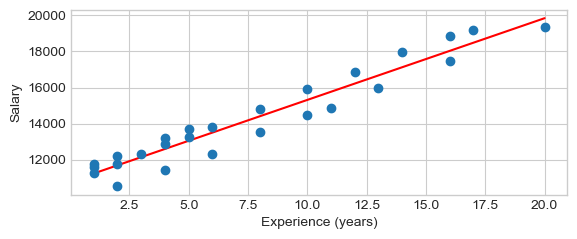

In [43]:
y, x = df.salary, df.experience
beta, beta0, r_value, p_value, std_err = scipy.stats.linregress(x,y)
print("y = %f x + %f,  r: %f, r-squared: %f,\np-value: %f, std_err: %f" 
      % (beta, beta0, r_value, r_value**2, p_value, std_err))

print("Regression line with the scatterplot")
yhat = beta * x  +  beta0 # regression line
plt.plot(x, yhat, 'r-', x, y,'o')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.show()

### Multiple Regression

**Theory**

Multiple Linear Regression is the most basic supervised learning algorithm.

Given: a set of training data $\{x_1, ... , x_N\}$ with corresponding targets $\{y_1, . . . , y_N\}$.

In linear regression, we assume that the model that generates the data involves only a linear combination of the input variables, i.e.

$$
y_i = \beta_0 + \beta_1 x_{i1} + ... + \beta_P x_{iP} + \varepsilon_i,
$$

or, simplified

$$
y_i  = \beta_0 + \sum_{j=1}^{P-1} \beta_j x_i^j + \varepsilon_i.
$$

Extending each sample with an intercept, $x_i := [1, x_i] \in R^{P+1}$ allows us to use a more general notation based on linear algebra and write it as a simple dot product:

$$
y_i = \mathbf{x}_i^T\mathbf{\beta} + \varepsilon_i,
$$

where $\beta \in R^{P+1}$ is a vector of weights that define the $P+1$ parameters of the model. From now we have $P$ regressors + the intercept.

Using the matrix notation:

$$
\begin{split}\begin{bmatrix}y_1 \\ y_2 \\ y_3 \\ y_4 \\ y_5  \end{bmatrix}
  =
  \begin{bmatrix}1 & x_{11}  & \ldots & x_{1P}\\1 & x_{21} & \ldots & x_{2P}  \\1 & x_{31} & \ldots & x_{3P}  \\1 & x_{41} & \ldots & x_{4P}  \\1 & x_5 & \ldots & x_5    \end{bmatrix}
  \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_P \end{bmatrix}
  +
  \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \epsilon_3 \\ \epsilon_4 \\ \epsilon_5 \end{bmatrix}\end{split}
$$

Let $X = [x_0^T, ... , x_N^T]$ be the ($N \times P+1$) **design matrix** of $N$ samples of $P$ input features with one column of one and let be $y = [y_1, ... , y_N]$ be a vector of the $N$ targets.

$$
y = X \beta + \varepsilon
$$

Minimize the Mean Squared Error MSE loss:

$$
MSE(\beta) = \frac{1}{N}\sum_{i=1}^{N}(y_i - \mathbf{x}_i^T\beta)^2
$$

Using the matrix notation, the **mean squared error (MSE) loss can be rewritten**:

$$
MSE(\beta) = \frac{1}{N}||y - X\beta||_2^2.
$$

The $\beta$ that minimizes the MSE can be found by:

\begin{align}
\nabla_\beta \left(\frac{1}{N} ||y - X\beta||_2^2\right) &= 0\\
\frac{1}{N}\nabla_\beta (y - X\beta)^T (y - X\beta) &= 0\\
\frac{1}{N}\nabla_\beta (y^Ty - 2 \beta^TX^Ty + \beta^T X^TX\beta) &= 0\\
    -2X^Ty + 2 X^TX\beta &= 0\\
    X^TX\beta &= X^Ty\\
    \beta &= (X^TX)^{-1} X^Ty,
\end{align}


where $(X^TX)^{-1} X^T$ is a pseudo inverse of $X$.

Simulated dataset where:

$$
\begin{split}\begin{bmatrix}y_1 \\ \vdots \\ y_{50}  \end{bmatrix}
  =
  \begin{bmatrix}
  1 & x_{1,1}  & x_{1,2} & x_{1,3} \\
  \vdots & \vdots  & \vdots & \vdots \\
  1 & x_{50,1}  & x_{50,2} & x_{50,3} \\
  \end{bmatrix}
  \begin{bmatrix} 10 \\ 1 \\ 0.5 \\ 0.1 \end{bmatrix}
  +
  \begin{bmatrix} \epsilon_1 \\ \vdots \\ \epsilon_{50} \end{bmatrix}\end{split}
$$

In [44]:
from scipy import linalg
np.random.seed(seed=42)  # make the example reproducible

# Dataset
N, P = 50, 4
X = np.random.normal(size= N * P).reshape((N, P))
## Our model needs an intercept so we add a column of 1s:
X[:, 0] = 1
print(X[:5, :])

betastar = np.array([10, 1., .5, 0.1])
e = np.random.normal(size=N)
y = np.dot(X, betastar) + e

[[ 1.         -0.1382643   0.64768854  1.52302986]
 [ 1.         -0.23413696  1.57921282  0.76743473]
 [ 1.          0.54256004 -0.46341769 -0.46572975]
 [ 1.         -1.91328024 -1.72491783 -0.56228753]
 [ 1.          0.31424733 -0.90802408 -1.4123037 ]]


**Fit with `numpy`**

Estimate the parameters

In [45]:
Xpinv = linalg.pinv(X)
betahat = np.dot(Xpinv, y)
print("Estimated beta:\n", betahat)

Estimated beta:
 [10.14742501  0.57938106  0.51654653  0.17862194]


### Linear Model with Statsmodels

[Statmodels examples](http://statsmodels.sourceforge.net/devel/examples/)

#### Multiple Regression Using Numpy Array

Interface with statsmodels without formulae  (`sm`)

In [46]:
## Fit and summary:
model = sm.OLS(y, X).fit()
print(model.summary())

# prediction of new values
ypred = model.predict(X)

# residuals + prediction == true values
assert np.all(ypred + model.resid == y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     8.748
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           0.000106
Time:                        12:49:10   Log-Likelihood:                -71.271
No. Observations:                  50   AIC:                             150.5
Df Residuals:                      46   BIC:                             158.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1474      0.150     67.520      0.0

#### Multiple Regression Pandas using formulae (`smf`)

Use `R` language syntax for data.frame.
For an additive model:

$y_i = \beta^0 + x_i^1 \beta^1 + x_i^2 \beta^2 + \epsilon_i \equiv$ `y ~ x1 + x2`.

In [47]:
df = pd.DataFrame(np.column_stack([X, y]),
                  columns=['inter', 'x1','x2', 'x3', 'y'])
print(df.columns, df.shape)
# Build a model excluding the intercept, it is implicit
model = smf.ols("y~x1 + x2 + x3", df).fit()
print(model.summary())

Index(['inter', 'x1', 'x2', 'x3', 'y'], dtype='object') (50, 5)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     8.748
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           0.000106
Time:                        12:49:10   Log-Likelihood:                -71.271
No. Observations:                  50   AIC:                             150.5
Df Residuals:                      46   BIC:                             158.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

### Multiple Regression Mixing Covariates and Factors (ANCOVA)

Analysis of covariance (ANCOVA) is a linear model that blends ANOVA and linear regression. ANCOVA evaluates whether population means of a dependent variable (DV) are equal across levels of a categorical independent variable (IV) often called a treatment, while statistically controlling for the effects of other quantitative or continuous variables that are not of primary interest, known as covariates (CV).

Jarque-Bera normality test p-value 0.04374


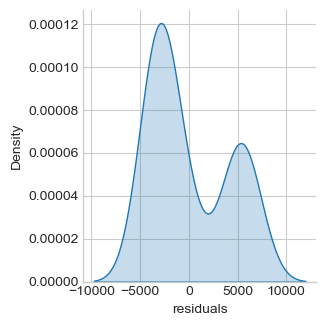

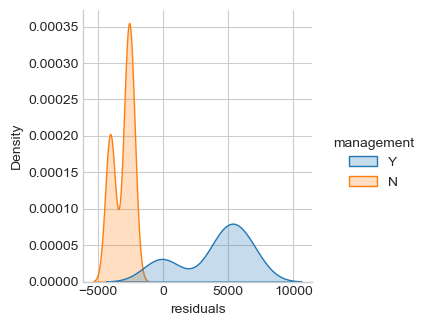

In [48]:
df = salary.copy()

lm = smf.ols('salary ~ experience', df).fit()
df["residuals"] = lm.resid

print("Jarque-Bera normality test p-value %.5f" % \
      sm.stats.jarque_bera(lm.resid)[1])

ax = sns.displot(df, x='residuals', kind="kde", fill=True, aspect=1, height=fig_h*0.7)
ax = sns.displot(df, x='residuals', kind="kde", hue='management', fill=True,
                 aspect=1, height=fig_h*0.7)

Normality assumption of the residuals can be rejected (p-value < 0.05). There is an efect of the "management" factor, take it into account. 

#### One-way AN(C)OVA

- ANOVA: one categorical independent variable, i.e. one factor.

- ANCOVA: ANOVA with some covariates.

                  sum_sq    df           F        PR(>F)
management  5.755739e+08   1.0  183.593466  4.054116e-17
experience  3.334992e+08   1.0  106.377768  3.349662e-13
Residual    1.348070e+08  43.0         NaN           NaN
Jarque-Bera normality test p-value 0.004


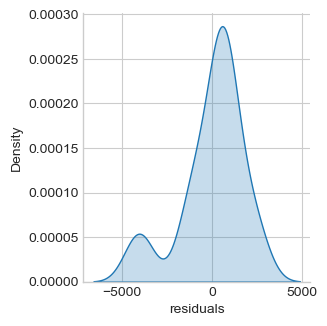

In [49]:
oneway = smf.ols('salary ~ management + experience', df).fit()
df["residuals"] = oneway.resid
sns.displot(df, x='residuals', kind="kde", fill=True,
            aspect=1, height=fig_h*0.7)
print(sm.stats.anova_lm(oneway, typ=2))
print("Jarque-Bera normality test p-value %.3f" %  \
      sm.stats.jarque_bera(oneway.resid)[1])

Distribution of residuals is still not normal but closer to normality. 
Both management and experience are significantly associated with salary.

#### Two-way AN(C)OVA

Ancova with two categorical independent variables, i.e. two factors.

                  sum_sq    df           F        PR(>F)
education   9.152624e+07   2.0   43.351589  7.672450e-11
management  5.075724e+08   1.0  480.825394  2.901444e-24
experience  3.380979e+08   1.0  320.281524  5.546313e-21
Residual    4.328072e+07  41.0         NaN           NaN
Jarque-Bera normality test p-value 0.506


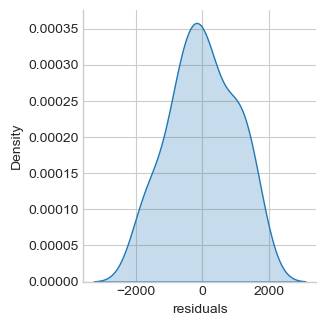

In [50]:
twoway = smf.ols('salary ~ education + management + experience', df).fit()

df["residuals"] = twoway.resid
sns.displot(df, x='residuals', kind="kde", fill=True,
            aspect=1, height=fig_h*0.7)
print(sm.stats.anova_lm(twoway, typ=2))

print("Jarque-Bera normality test p-value %.3f" %  \
      sm.stats.jarque_bera(twoway.resid)[1])

Normality assumtion cannot be rejected. Assume it.
Education, management and experience are significantly associated with salary.

#### Comparing Two Nested Models

`oneway` is nested within `twoway`.  Comparing two nested models tells us if the additional predictors (i.e. `education`) of the full model significantly decrease the residuals. Such comparison can be done using an $F$-test on residuals:

In [51]:
print(twoway.compare_f_test(oneway))  # return F, pval, df

(np.float64(43.35158945918104), np.float64(7.6724495704955e-11), np.float64(2.0))


twoway is significantly better than one way

#### Factor Coding

[Statsmodels contrasts](http://statsmodels.sourceforge.net/devel/contrasts.html).
By default Pandas use "dummy coding". Explore:

In [52]:
print(twoway.model.data.param_names)
print(twoway.model.data.exog[:10, :])

['Intercept', 'education[T.Master]', 'education[T.Ph.D]', 'management[T.Y]', 'experience']
[[1. 0. 0. 1. 1.]
 [1. 0. 1. 0. 1.]
 [1. 0. 1. 1. 1.]
 [1. 1. 0. 0. 1.]
 [1. 0. 1. 0. 1.]
 [1. 1. 0. 1. 2.]
 [1. 1. 0. 0. 2.]
 [1. 0. 0. 0. 2.]
 [1. 0. 1. 0. 2.]
 [1. 1. 0. 0. 3.]]


#### Contrasts and Post-hoc Tests

In [53]:
# t-test of the specific contribution of experience:
ttest_exp = twoway.t_test([0, 0, 0, 0, 1])
ttest_exp.pvalue, ttest_exp.tvalue
print(ttest_exp)

# Alternatively, you can specify the hypothesis tests using a string
twoway.t_test('experience')

# Post-hoc is salary of Master different salary of Ph.D? 
# ie. t-test salary of Master = salary of Ph.D.
print(twoway.t_test('education[T.Master] = education[T.Ph.D]'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           546.1840     30.519     17.896      0.000     484.549     607.819
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           147.8249    387.659      0.381      0.705    -635.069     930.719


## Multiple Comparisons

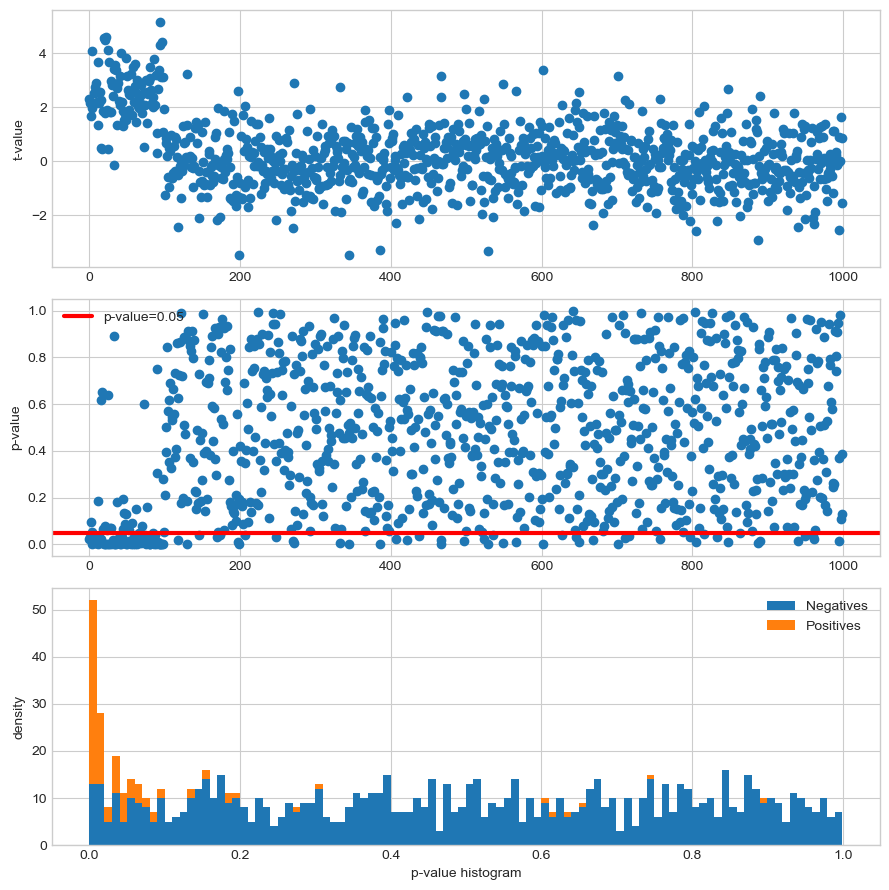

In [54]:
np.random.seed(seed=42)  # make example reproducible

# Dataset
n_samples, n_features = 100, 1000
n_info = int(n_features/10)  # number of features with information
n1, n2 = int(n_samples/2), n_samples - int(n_samples/2)
snr = .5
Y = np.random.randn(n_samples, n_features)
grp = np.array(["g1"] * n1 + ["g2"] * n2)

# Add some group effect for Pinfo features
Y[grp=="g1", :n_info] += snr

# 
import scipy.stats as stats
#import matplotlib.pyplot as plt
tvals, pvals = np.full(n_features, np.nan), np.full(n_features, np.nan)
for j in range(n_features):
    tvals[j], pvals[j] = stats.ttest_ind(Y[grp=="g1", j], Y[grp=="g2", j],
                                         equal_var=True)

fig, axis = plt.subplots(3, 1, figsize=(9, 9))#, sharex='col')

axis[0].plot(range(n_features), tvals, 'o')
axis[0].set_ylabel("t-value")

axis[1].plot(range(n_features), pvals, 'o')
axis[1].axhline(y=0.05, color='red', linewidth=3, label="p-value=0.05")
#axis[1].axhline(y=0.05, label="toto", color='red')
axis[1].set_ylabel("p-value")
axis[1].legend()

axis[2].hist([pvals[n_info:], pvals[:n_info]], 
    stacked=True, bins=100, label=["Negatives", "Positives"])
axis[2].set_xlabel("p-value histogram")
axis[2].set_ylabel("density")
axis[2].legend()

plt.tight_layout()

Note that under the null hypothesis the distribution of the *p*-values is uniform.

Statistical measures:

- **True Positive (TP)** equivalent to a hit. The test correctly concludes the presence of an effect.

- True Negative (TN). The test correctly concludes the absence of an effect.

- **False Positive (FP)** equivalent to a false alarm, **Type I error**. The test improperly concludes the presence of an effect. Thresholding at $p\text{-value} < 0.05$ leads to 47 FP.

- False Negative (FN) equivalent to a miss, Type II error. The test improperly concludes the absence of an effect.

In [55]:
P, N = n_info, n_features - n_info  # Positives, Negatives
TP = np.sum(pvals[:n_info ] < 0.05)  # True Positives
FP = np.sum(pvals[n_info: ] < 0.05)  # False Positives
print("No correction, FP: %i (expected: %.2f), TP: %i" % (FP, N * 0.05, TP))

No correction, FP: 47 (expected: 45.00), TP: 71


### Bonferroni Correction for Multiple Comparisons

The Bonferroni correction is based on the idea that if an experimenter is testing $P$ hypotheses, then one way of maintaining the **Family-wise error rate** [FWER](https://en.wikipedia.org/wiki/Family-wise_error_rate) is to test each individual hypothesis at a statistical significance level of $1/P$ times the desired maximum overall level.

So, if the desired significance level for the whole family of tests is $\alpha$ (usually 0.05), then the Bonferroni correction would test each individual hypothesis at a significance level of $\alpha/P$. For example, if a trial is testing $P = 8$ hypotheses with a desired $\alpha = 0.05$, then the Bonferroni correction would test each individual hypothesis at $\alpha = 0.05/8 = 0.00625$.

In [56]:
import statsmodels.sandbox.stats.multicomp as multicomp

_, pvals_fwer, _, _  = multicomp.multipletests(pvals, alpha=0.05, 
                                               method='bonferroni')
TP = np.sum(pvals_fwer[:n_info ] < 0.05)  # True Positives
FP = np.sum(pvals_fwer[n_info: ] < 0.05)  # False Positives
print("FWER correction, FP: %i, TP: %i" % (FP, TP))

FWER correction, FP: 0, TP: 6


### The False Discovery Rate (FDR) Correction for Multiple Comparisons

FDR-controlling procedures are designed to control the expected proportion of rejected null hypotheses that were incorrect rejections ("false discoveries"). FDR-controlling procedures provide less stringent control of Type I errors compared to the familywise error rate (FWER) controlling procedures (such as the Bonferroni correction), which control the probability of at least one Type I error. Thus, FDR-controlling procedures have greater power, at the cost of increased rates of Type I errors.

In [57]:
_, pvals_fdr, _, _  = multicomp.multipletests(pvals, alpha=0.05, 
                                               method='fdr_bh')
TP = np.sum(pvals_fdr[:n_info ] < 0.05)  # True Positives
FP = np.sum(pvals_fdr[n_info: ] < 0.05)  # False Positives

print("FDR correction, FP: %i, TP: %i" % (FP, TP))

FDR correction, FP: 3, TP: 20
